In [30]:
import matplotlib.pyplot as plt
from src.envs import NoThreeCollinearEnv, Point, NoThreeCollinearEnvWithPriority

In [31]:
def conic_p_construction(p):
    points = []
    for x in range(p):
        for y in range(p):
            if (y-x**2) % p == 0:
                points.append(Point(x, y))

    return points

def HJSW_2p_construction(p, k=1):
    points = []
    # Use integer division for half intervals
    half_p = (p - 1) // 2
    half_p_plus = (p + 1) // 2

    # Loop over x in extended range, with shifted origin to avoid floats
    for x in range(-half_p, p + half_p + 1):
        for y in range(2 * p):
            if (x * y) % p != k:
                continue

            # Check which block it falls into
            if (
                # A blocks
                (0 * p < x <= 0 * p + half_p and 1 * p + half_p_plus <= y < 2 * p) or
                (1 * p < x <= 1 * p + half_p and 0 * p + half_p_plus <= y < 1 * p) or
                (1 * p < x <= 1 * p + half_p and 1 * p + half_p_plus <= y < 2 * p)
            ):
                points.append((x+half_p, y))
                continue

            if (
                # B blocks
                (0 * p + half_p_plus <= x < 1 * p and 1 * p + half_p_plus <= y < 2 * p) or
                (-1 * p + half_p_plus <= x < 0 * p and 0 * p + half_p_plus <= y < 1 * p) or
                (-1 * p + half_p_plus <= x < 0 * p and 1 * p + half_p_plus <= y < 2 * p)
            ):
                points.append((x+half_p, y))
                continue

            if (
                # C blocks
                (0 * p < x <= 0 * p + half_p and 0 * p < y <= 0 * p + half_p) or
                (1 * p < x <= 1 * p + half_p and 0 * p < y <= 0 * p + half_p) or
                (1 * p < x <= 1 * p + half_p and 1 * p < y <= 1 * p + half_p)
            ):
                points.append((x+half_p, y))
                continue

            if (
                # D blocks
                (0 * p + half_p_plus <= x < 1 * p and 0 * p < y <= 0 * p + half_p) or
                (-1 * p + half_p_plus <= x < 0 * p and 0 * p < y <= 0 * p + half_p) or
                (-1 * p + half_p_plus <= x < 0 * p and 1 * p < y <= 1 * p + half_p)
            ):
                points.append((x+ half_p, y))

    return points


In [32]:
primes = (3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241)

p=3:  greedy improvement: 2
p=5:  greedy improvement: 4
p=7:  greedy improvement: 4
p=11:  greedy improvement: 6
p=13:  greedy improvement: 7
p=17:  greedy improvement: 9
p=19:  greedy improvement: 9
p=23:  greedy improvement: 10
p=29:  greedy improvement: 13
p=31:  greedy improvement: 13
p=37:  greedy improvement: 18
p=41:  greedy improvement: 21
p=43:  greedy improvement: 19
p=47:  greedy improvement: 27
p=53:  greedy improvement: 22
p=59:  greedy improvement: 27
p=61:  greedy improvement: 30
p=67:  greedy improvement: 30
p=71:  greedy improvement: 36
p=73:  greedy improvement: 32
p=79:  greedy improvement: 37
p=83:  greedy improvement: 40
p=89:  greedy improvement: 43
p=97:  greedy improvement: 44
p=101:  greedy improvement: 45
p=103:  greedy improvement: 43
p=107:  greedy improvement: 49
p=109:  greedy improvement: 51
p=113:  greedy improvement: 53
p=127:  greedy improvement: 52
p=131:  greedy improvement: 58
p=137:  greedy improvement: 61
p=139:  greedy improvement: 65
p=149:  gre

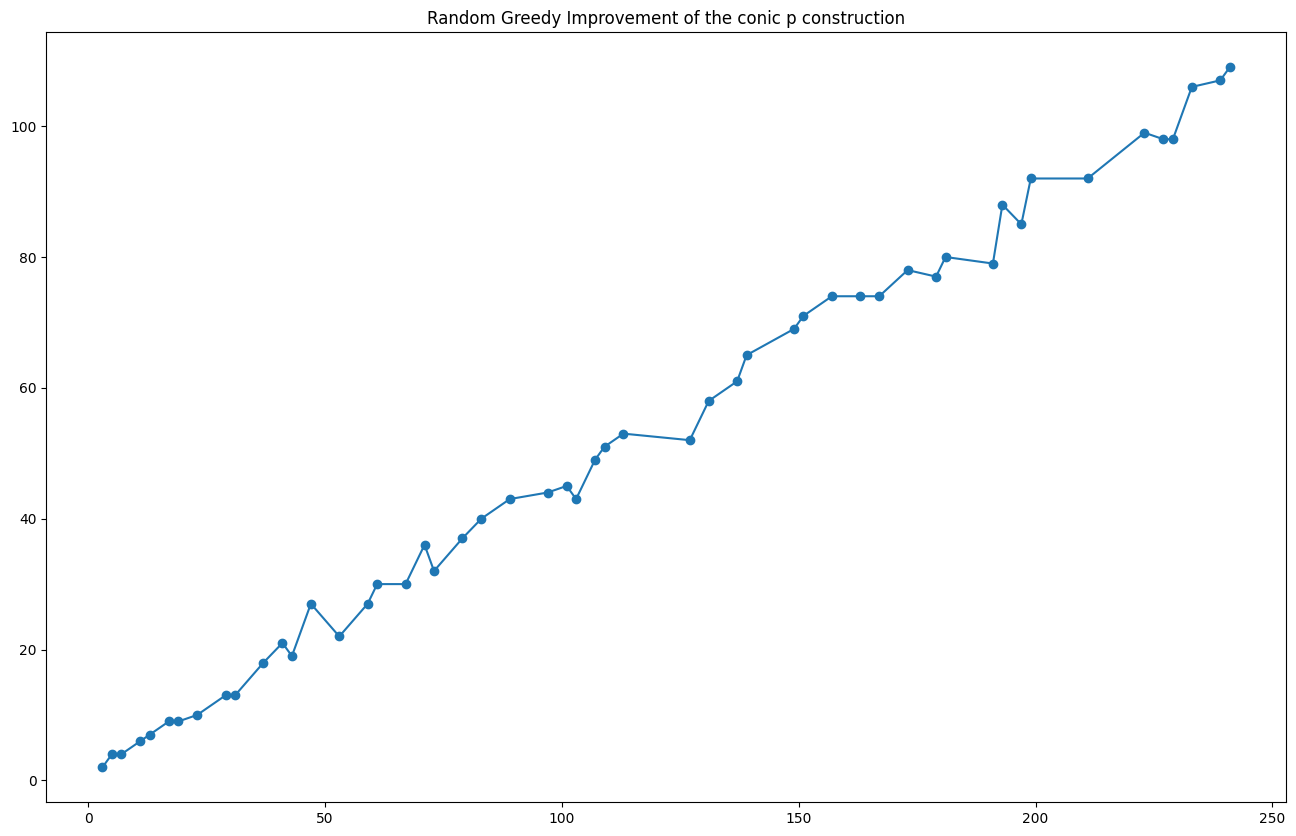

In [33]:
improve = {}

for p in primes:
    env = NoThreeCollinearEnvWithPriority(p, p)
    points = conic_p_construction(p)
    for point in points:
        env.self_play_add_point(Point(point[0], point[1]), plot=False)

    env.greedy_search()
    improve[p] = len(env.points)-len(points)
    print(f"p={p}: ", "greedy improvement:", len(env.points)-len(points))

plt.figure(figsize=(16,10))
plt.title("Random Greedy Improvement of the conic p construction")
plt.plot(improve.keys(), improve.values(), marker='o')
plt.show()

p=3:  greedy improvement: 3
p=5:  greedy improvement: 4
p=7:  greedy improvement: 4
p=11:  greedy improvement: 4
p=13:  greedy improvement: 2
p=17:  greedy improvement: 6
p=19:  greedy improvement: 5
p=23:  greedy improvement: 5
p=29:  greedy improvement: 4
p=31:  greedy improvement: 8
p=37:  greedy improvement: 7
p=41:  greedy improvement: 4
p=43:  greedy improvement: 5
p=47:  greedy improvement: 5
p=53:  greedy improvement: 6
p=59:  greedy improvement: 7
p=61:  greedy improvement: 12
p=67:  greedy improvement: 11
p=71:  greedy improvement: 11
p=73:  greedy improvement: 8
p=79:  greedy improvement: 6
p=83:  greedy improvement: 12
p=89:  greedy improvement: 9
p=97:  greedy improvement: 15
p=101:  greedy improvement: 13
p=103:  greedy improvement: 10
p=107:  greedy improvement: 15
p=109:  greedy improvement: 12
p=113:  greedy improvement: 13
p=127:  greedy improvement: 14
p=131:  greedy improvement: 7
p=137:  greedy improvement: 12
p=139:  greedy improvement: 21
p=149:  greedy improveme

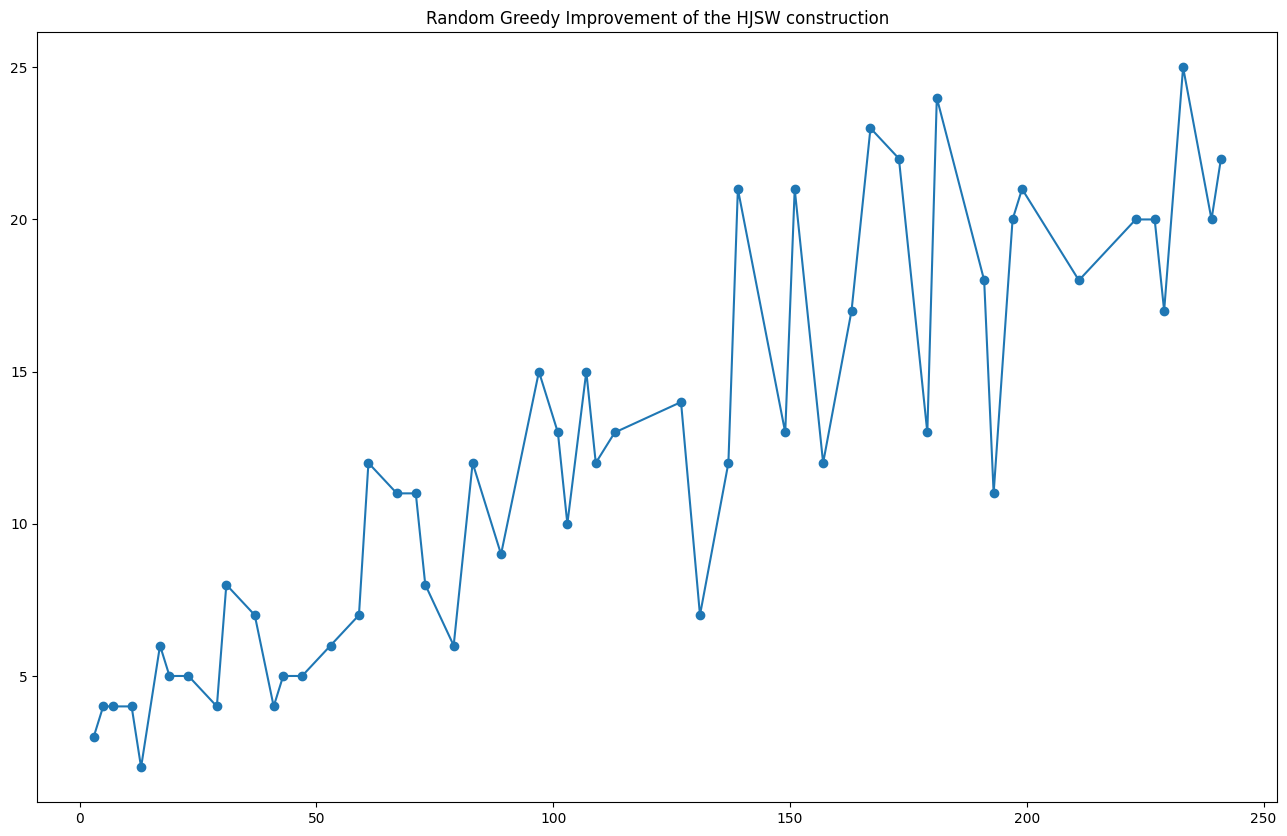

In [34]:
improve = {}

for p in primes:
    env = NoThreeCollinearEnvWithPriority(2*p, 2*p)
    for point in HJSW_2p_construction(p, k=1):
        env.self_play_add_point(Point(point[0], point[1]), plot=False)
    env.greedy_search()
    improve[p] = (len(env.points) - 3*(p-1))
    print(f"p={p}: ", "greedy improvement:", len(env.points) - 3*(p-1))

plt.figure(figsize=(16,10))
plt.title("Random Greedy Improvement of the HJSW construction")
plt.plot(improve.keys(), improve.values(), marker='o')
plt.show()